In [1]:
# Step 1: Install & Import Required Libraries
!pip install librosa --quiet

In [1]:
!pip install librosa resampy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.9 MB/s eta 0:00:0000:01


In [4]:
# ✅ Step 1: Install Required Libraries


# ✅ Step 2: Import Libraries
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape



In [5]:
# ✅ Temporary Fix for numpy deprecation issue
np.complex = complex

# ✅ Step 3: Define Dataset Directory
data_dir = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"



In [6]:
# ✅ Step 4: Extract File Paths and Emotion Labels
file_paths = []
emotions = []

for root, _, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav"):
            file_paths.append(os.path.join(root, file))
            label = os.path.basename(root).split("_")[-1].lower()  # e.g., "TESS_Sad" → "sad"
            emotions.append(label)




In [7]:
# ✅ Step 5: Feature Extraction using MFCC
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

X = []
for path in file_paths:
    try:
        features = extract_features(path)
        X.append(features)
    except Exception as e:
        print(f"Error extracting from {path}: {e}")

X = np.array(X)
y = np.array(emotions)



In [8]:
# Show 1 example MFCC vector
print("MFCC feature vector shape:", X[0].shape)
print("MFCC features (first audio):\n", X[0])


MFCC feature vector shape: (40,)
MFCC features (first audio):
 [-2.6838263e+02  7.9544052e+01  3.4613121e+00  2.9725748e+01
 -1.3156389e+01  1.0164041e+01  1.9872499e+00  1.9135851e+00
 -8.5895376e+00  9.3142347e+00 -2.0550585e+01  1.8446518e-01
 -1.9760144e+00  3.2033067e+00 -7.2845464e+00  1.0116191e+00
 -1.1541403e+01  8.5636663e+00  4.9356017e+00  1.5403457e+01
  1.7630152e+01  1.1461351e+01 -1.3352728e+00  2.3257177e+00
 -5.4334784e+00  6.9964337e+00  2.7630877e-01 -3.8485463e+00
 -7.1591392e+00 -2.0394254e+00 -1.9968892e+00  3.5480611e+00
 -5.3756742e+00 -5.9678845e+00 -1.2007668e+00  1.3598107e+00
 -1.5759747e-01  5.2597213e-01  7.1399007e+00  5.4307394e+00]


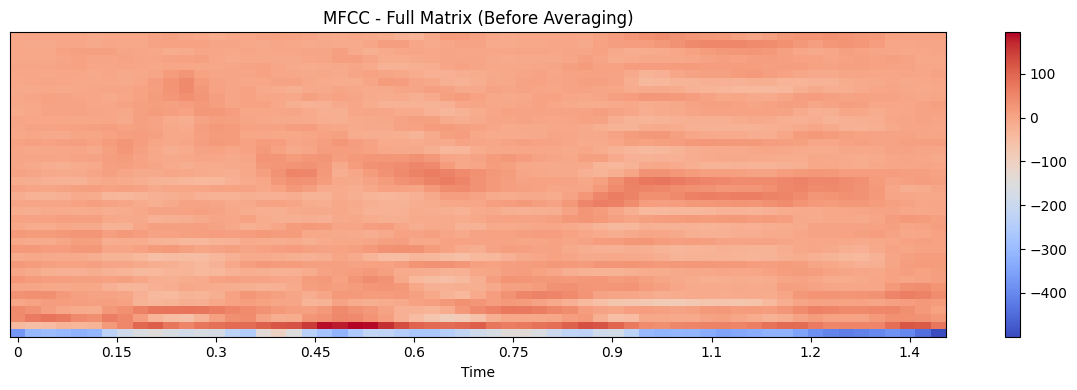

In [9]:
# Visualize MFCC matrix of a single audio file
import librosa.display

audio, sr = librosa.load(file_paths[0], res_type='kaiser_fast')
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC - Full Matrix (Before Averaging)")
plt.tight_layout()
plt.show()


In [10]:
# ✅ Step 6: Encode Labels and Split Dataset
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [11]:
# ✅ Step 7: Build LSTM Model
model = Sequential([
    Reshape((40, 1), input_shape=(40,)),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.3432 - loss: 1.6829 - val_accuracy: 0.8214 - val_loss: 0.5977
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8003 - loss: 0.5431 - val_accuracy: 0.9089 - val_loss: 0.3004
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9236 - loss: 0.2616 - val_accuracy: 0.9250 - val_loss: 0.2663
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9435 - loss: 0.1904 - val_accuracy: 0.9446 - val_loss: 0.1976
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9585 - loss: 0.1426 - val_accuracy: 0.9696 - val_loss: 0.1224
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9515 - loss: 0.1402 - val_accuracy: 0.9589 - val_loss: 0.1188
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9632 - loss: 0.1142 - val_accuracy: 0.9518 - val_loss: 0.1457
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9634 - loss: 0.1098 - val_accuracy: 0.9429 - v

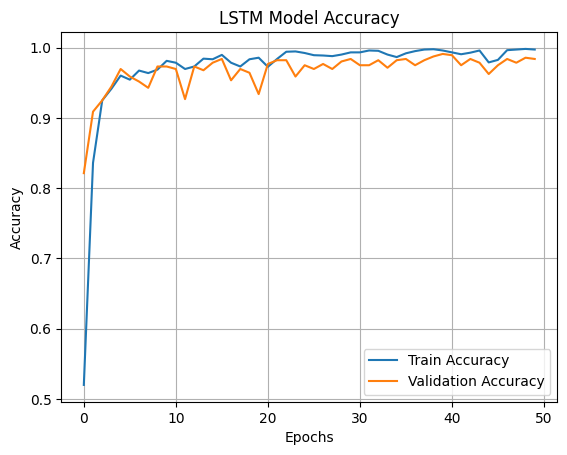

In [12]:
# ✅ Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ✅ Step 9: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# ✅ Step 10: Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()